# **IEOR 4404  Simulation (Fall 2020)**

**Homework 5 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Nov 29**

Homework 4 consists of application-oriented exercises focusing on:
* `simpy` simulation of systems

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [1]:
#Your Name: Ziyang  Zhang
#Your UNI: zz2732

In [2]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np


import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
!pip install simpy
import simpy

#Exercise 1 [20 Points]

An M/M/1 queue represents the queue length in a system having a **single server**, where arrivals are determined by a **Homogeneous Poisson process** with rate $\lambda$ and job service times have an **exponential distribution** with rate $\mu$ (i.e. mean service time is $1/\mu$). 





##Q1.  [12 points]

An M/M/1 system is stationary if $\lambda<\mu$. For a non-stationary system, the queue will be growing indefinitely long as time goes to infinity. 

* Construct an M/M/1 system using `simpy` assume $\lambda=8$ and $\mu=2$. Use `Rn_arrival=np.random.RandomState(10)` to generate the random numbers used to generate the arrival times. Use `Rn_service=np.random.RandomState(100)` to the random numbers used to generate the service times. Simulate the system between $t=0$ and $t=100$

* Plot the relationship between time and the number of people in the system above (including both lining up and receiving the service ) using  [plt.step()](https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/). Argue that the system is not stationary.

* Change to $\lambda=1$ and $\mu=2$. Plot the relationship between the time and the number of people in the system above (including both lining up and receiving the service ) from $t=0$ to  $t=100$ using [plt.step()](https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/).  

 
 

In [ ]:
# single server
# arrivals: Homogeneous Poisson process ~ lambda
# service times: Exponential Distribution ~ mu

    # stationary: lambda < mu
    # non-stationary: lambda > mu

# From t=0 to t=100

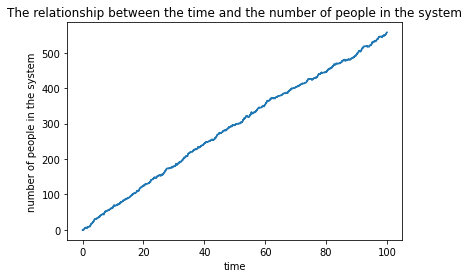

In [ ]:
# non-stationary:
    # lambda = 8
    # mu = 2

# customers arrival process
def arrival(lm,mu,env,Outputs,desk):
    while True:
        inter_arrival=-1/lm*np.log(Rn_arrival.rand())
        yield env.timeout(inter_arrival)
        #generating a new service process for the new arrival
        env.process((service(mu,env,Outputs,desk)))
        
# front desk service process
def service(mu,env,Outputs,desk):
    # 1. send a request to the server
    rqt=desk.request() #an event
    Outputs['time'].append(env.now)
    Outputs['number of people'].append(len(desk.queue)+len(desk.users))

    # 2. allow the customer to occupy the server
    yield rqt
    
    # 3. current customer spend x amount of time using the server
    cost=-1/mu*np.log(Rn_service.rand())
    yield env.timeout(cost)  # assuming every task takes service time that follows a Exponential Distribution with mu
    
    # 4. release the request from the server, so that the server will be able to serve next customer
    desk.release(rqt)
    Outputs['time'].append(env.now)
    Outputs['number of people'].append(len(desk.queue)+len(desk.users))

Rn_arrival=np.random.RandomState(10)
Rn_service=np.random.RandomState(100)
Outputs={'time':[0], 'number of people':[0]}
env=simpy.Environment()
desk=simpy.Resource(env)
env.process(arrival(8,2,env,Outputs,desk))
env.run(until=100)

plt.step(Outputs['time'],Outputs['number of people'])
plt.xlabel('time')
plt.ylabel('number of people in the system')
plt.title('The relationship between the time and the number of people in the system')
plt.show()

Based on the plot above, as time goes from 0 to 100, the number of people in the system keeps increasing. Therefore, we can infer that as time goes to infinity, the size of the queue will also be growing indefinitely long, meaning this is a NON-STATIONARY M/M/1 system.

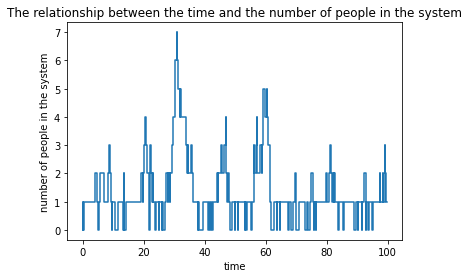

In [ ]:
# stationary:
    # lambda = 1
    # mu = 2

# customers arrival process
def arrival(lm,mu,env,Outputs,desk):
    while True:
        inter_arrival=-1/lm*np.log(Rn_arrival.rand())
        yield env.timeout(inter_arrival)
        #generating a new service process for the new arrival
        env.process((service(mu,env,Outputs,desk)))
        
# front desk service process
def service(mu,env,Outputs,desk):
    # 1. send a request to the server
    rqt=desk.request() #an event
    Outputs['time'].append(env.now)
    Outputs['number of people'].append(len(desk.queue)+len(desk.users))

    # 2. allow the customer to occupy the server
    yield rqt
    
    # 3. current customer spend x amount of time using the server
    cost=-1/mu*np.log(Rn_service.rand())
    yield env.timeout(cost)  # assuming every task takes service time that follows a Exponential Distribution with mu
    
    # 4. release the request from the server, so that the server will be able to serve next customer
    desk.release(rqt)
    Outputs['time'].append(env.now)
    Outputs['number of people'].append(len(desk.queue)+len(desk.users))

Rn_arrival=np.random.RandomState(10)
Rn_service=np.random.RandomState(100)
Outputs={'time':[0], 'number of people':[0]}
env=simpy.Environment()
desk=simpy.Resource(env)
env.process(arrival(1,2,env,Outputs,desk))
env.run(until=100)

plt.step(Outputs['time'],Outputs['number of people'])
plt.xlabel('time')
plt.ylabel('number of people in the system')
plt.title('The relationship between the time and the number of people in the system')
plt.show()

##Q2. [8 points]

If the system is stationary, then the probability of having $i$ customers at a sufficiently large $t$ (including the one in service) is 

$P(i)=(1-\rho)\rho^i, i=0,1,2, \dots$ .

where $\rho=\frac{\lambda}{\mu}$

For this question, let's assume we have an M/M/1 system with $\lambda=1.5$ and $\mu=2$

* Simulate the system to record the number of people in the system at t=100.
* Repeat the system simulation 1000 times.
* Plot the sample and theoretical distribution of the number of people in the system at t=100.

In [ ]:
# Define a function that simulates the system once and returns the number of people in the system at t=100
# The functino takes `lambda` and `mu` as arguments
def system_N(LM, MU):
    Rn_arrival=np.random.RandomState()
    Rn_service=np.random.RandomState()
    Outputs={'time':[0], 'number of people':[0]}
    env=simpy.Environment()
    desk=simpy.Resource(env)
    env.process(arrival(LM,MU,env,Outputs,desk))
    env.run(until=100)
    return Outputs['number of people'][-1]

# Then we can use list comprehension to simulate the system 1000 times below.

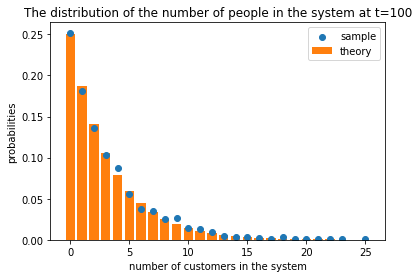

In [ ]:
# lambda=1.5
# mu=2
lmbda=1.5
mu=2
# simulate the system 1000 times and record the number of people in the system at t=100 (a sufficiently large t)
samples=np.array([system_N(lmbda,mu) for i in range(1000)])
# this is a Discrete Distribution, since i=0,1,2,3,...
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),label="sample",zorder=2)
i=np.arange(np.max(values)+1)
pho=lmbda/mu
pmf=(1-pho)*pho**i
plt.bar(i,pmf,label="theory")
plt.legend(loc="best")
plt.xlabel("number of customers in the system")
plt.ylabel("probabilities")
plt.title('The distribution of the number of people in the system at t=100')
plt.show()

#Exercise 2 [30 Points]

##Setting

![title](https://onlinevending.com/wp-content/uploads/2016/07/Untitled-106-300x300.png)

A vending machine has 15 different products. The vending machines started as full with 20 units in stock for each product (300 items in total). Customers arrive every 0.1 hours at a vending machine and make a purchase. Each customer wants to purchase $x$ units of product $i$. Let's assume that $i$ is equally likely to be between 1 and 15. For $x$, let's assume follows a discrete uniform distribution between 0 and 3. If product $i$ has stock level $s$ is lower than what the customer wants, the customer will purchase all the units left for the product $i$. 

Once the stock level of any product goes below $z$ and no refill order is waiting to be fulfilled, a refill will be requested. The refill takes 1.95 hours to be fulfilled. During the process, consumers can still make purchases normally. Once the refill request is fulfilled, the vending machine becomes full again.

Let's assume that the sales of each item generate a profit of 0.5 dollars. Each refill trip costs 20 dollars. The cost is counted once a refill process starts.

**<font color="red">In this question, you are NOT allowed to use any built-in sampling function except np.random.rand() </font>**



## Q1. [23 points]

* Based on `simpy`, simulate the system for a week. Assume $z=4$. Return the revenue from the goods minus the refill trip costs. 
* Repeat the system 100 times. Report the average revenue.

In [4]:
# Simulate the system for a week.
# Return the PROFIT(revenue from goods- refill trip costs)

def arrival(inventory,Outputs,z,env,desk):
  while True:                                       # both using Direct Conversion method:
    pdt=int(np.random.rand()*15)+1     # product chosen: equally likely b/w 1 and 15
    qty=int(np.random.rand()*4)        # quantity purchased: discrete uniform distribution between 0 and 3
    yield env.timeout(0.1)
    print('customer bought '+str(qty)+' units of product '+str(pdt), 'time: ', env.now)

    if qty<=inventory[pdt]:
      Outputs['Sales Profit'].append(qty*0.5)
      inventory[pdt]-=qty
    else:
      Outputs['Sales Profit'].append(inventory[pdt]*0.5)
      inventory[pdt]=0
    print(inventory)
    
    # stock level of any product goes below `z` and no refill order is waiting to be fulfilled
    if inventory[pdt]<z and len(desk.users)==0:
      print('Need a refill!!!', 'time: ', env.now)
      env.process(refill(inventory,Outputs,env,desk))

def refill(inventory,Outputs,env,desk):
  rqt=desk.request()
  yield rqt
  Outputs['Refill Cost'].append(20)
  yield env.timeout(1.95)
  print('A refill is fulfilled. Vending machine is FULL again!!!', 'time: ', env.now)
  for j in range(1,16):
    inventory[j]=20
  print(inventory)
  desk.release(rqt)

def system_N(z,T):
  np.random.seed(10)
  # Initialize `inventory`: all products start with full stock of 20
  inventory={i : 20 for i in range(1, 16)}
  # Initialize `Outputs`: storing profits and costs
  Outputs={'Sales Profit':[],'Refill Cost':[]}
  env=simpy.Environment()
  desk=simpy.Resource(env)   # define a server with capacity=1, 
                            # since refill requests can only be fulfilled 1 by 1
  env.process(arrival(inventory,Outputs,z,env,desk))
  env.run(until=T)
  return sum(Outputs['Sales Profit'])-sum(Outputs['Refill Cost'])

# z = 4
# T = 24*7 = 168 hrs (1 week)
system_N(4,168)
# Return the PROFIT(revenue from goods- refill trip costs)

customer bought 0 units of product 12 time:  0.1
{1: 20, 2: 20, 3: 20, 4: 20, 5: 20, 6: 20, 7: 20, 8: 20, 9: 20, 10: 20, 11: 20, 12: 20, 13: 20, 14: 20, 15: 20}
customer bought 2 units of product 10 time:  0.2
{1: 20, 2: 20, 3: 20, 4: 20, 5: 20, 6: 20, 7: 20, 8: 20, 9: 20, 10: 18, 11: 20, 12: 20, 13: 20, 14: 20, 15: 20}
customer bought 0 units of product 8 time:  0.30000000000000004
{1: 20, 2: 20, 3: 20, 4: 20, 5: 20, 6: 20, 7: 20, 8: 20, 9: 20, 10: 18, 11: 20, 12: 20, 13: 20, 14: 20, 15: 20}
customer bought 3 units of product 3 time:  0.4
{1: 20, 2: 20, 3: 17, 4: 20, 5: 20, 6: 20, 7: 20, 8: 20, 9: 20, 10: 18, 11: 20, 12: 20, 13: 20, 14: 20, 15: 20}
customer bought 0 units of product 3 time:  0.5
{1: 20, 2: 20, 3: 17, 4: 20, 5: 20, 6: 20, 7: 20, 8: 20, 9: 20, 10: 18, 11: 20, 12: 20, 13: 20, 14: 20, 15: 20}
customer bought 3 units of product 11 time:  0.6
{1: 20, 2: 20, 3: 17, 4: 20, 5: 20, 6: 20, 7: 20, 8: 20, 9: 20, 10: 18, 11: 17, 12: 20, 13: 20, 14: 20, 15: 20}
customer bought 2 uni

910.5

In [ ]:
# Simulate the system for a week.
# Return the PROFIT(revenue from goods- refill trip costs)

def arrival(inventory,Outputs,z,env,desk):
  while True:                                       # both using Direct Conversion method:
    pdt=int(np.random.rand()*15)+1     # product chosen: equally likely b/w 1 and 15
    qty=int(np.random.rand()*4)        # quantity purchased: discrete uniform distribution between 0 and 3
    yield env.timeout(0.1)
    # print('customer bought '+str(qty)+' units of product '+str(pdt), 'time: ', env.now)

    if qty<=inventory[pdt]:
      Outputs['Sales Profit'].append(qty*0.5)
      inventory[pdt]-=qty
    else:
      Outputs['Sales Profit'].append(inventory[pdt]*0.5)
      inventory[pdt]=0
    # print(inventory)
    
    # stock level of any product goes below `z` and no refill order is waiting to be fulfilled
    if inventory[pdt]<z and len(desk.users)==0:
      #print('Need a refill!!!', 'time: ', env.now)
      env.process(refill(inventory,Outputs,env,desk))

def refill(inventory,Outputs,env,desk):
  rqt=desk.request()
  yield rqt
  Outputs['Refill Cost'].append(20)
  yield env.timeout(1.95)
  #print('A refill is fulfilled. Vending machine is FULL again!!!', 'time: ', env.now)
  for j in range(1,16):
    inventory[j]=20
  #print(inventory)
  desk.release(rqt)

def system_N(z,T):
  # Initialize `inventory`: all products start with full stock of 20
  inventory={i : 20 for i in range(1, 16)}
  # Initialize `Outputs`: storing profits and costs
  Outputs={'Sales Profit':[],'Refill Cost':[]}
  env=simpy.Environment()
  desk=simpy.Resource(env)   # define a server with capacity=1, 
                            # since refill requests can only be fulfilled 1 by 1
  env.process(arrival(inventory,Outputs,z,env,desk))
  env.run(until=T)
  return sum(Outputs['Sales Profit'])-sum(Outputs['Refill Cost'])

# z = 4
# T = 24*7 = 168 hrs (1 week)
system_N(4,168)
# Return the PROFIT(revenue from goods- refill trip costs)

936.5

In [ ]:
# Repeat the system 100 times. Report the average PROFIT.
np.mean([system_N(4,168) for i in range(100)])

930.43

##Q2. [7 points]

* Now, use different $z$ values for the exercise in Q1. Plot the relationship between $z$ and the average system output.
* Find the best $z$ value.

z:  1  average PROFIT:  970.955
z:  2  average PROFIT:  965.32
z:  3  average PROFIT:  944.555
z:  4  average PROFIT:  928.54
z:  5  average PROFIT:  909.335
z:  6  average PROFIT:  885.285
z:  7  average PROFIT:  859.59
z:  8  average PROFIT:  820.36
z:  9  average PROFIT:  779.37
z:  10  average PROFIT:  734.63
z:  11  average PROFIT:  675.38
z:  12  average PROFIT:  605.95
z:  13  average PROFIT:  527.305
z:  14  average PROFIT:  441.165
z:  15  average PROFIT:  311.55
z:  16  average PROFIT:  173.97
z:  17  average PROFIT:  56.15
z:  18  average PROFIT:  -237.49
z:  19  average PROFIT:  -352.2
z:  20  average PROFIT:  -400.565


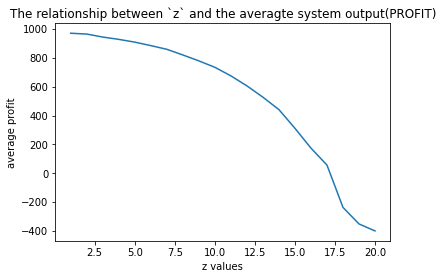

In [ ]:
# Try different `z` values: 1,2,3,...,20
average_profit=[]
z_values=list(range(1,21))
for z in z_values:
  p=np.mean([system_N(z,168) for i in range(100)])
  average_profit.append(p)
  print('z: ', z_values[z-1], ' average PROFIT: ', average_profit[z-1])
# Plot the relationship between `z` and the averagte system output(PROFIT).
plt.plot(z_values,average_profit)
plt.xlabel('z values')
plt.ylabel('average profit')
plt.title('The relationship between `z` and the averagte system output(PROFIT)')
plt.show()

In [ ]:
# Find the best `z` value.
max_profit=max(average_profit)
best_z=z_values[average_profit.index(max_profit)]
best_z

1

By looking at the plot between different $z$ values and values of average PROFIT, we should pick $z=1$ to get the maximum average profit. It means that we only request a refill when one of the product is completely sold out.

# Exercise 3 [30 Points]




![title](https://images.squarespace-cdn.com/content/v1/518ac285e4b0288d5ff90c6f/1377221007294-HNC3JDD4UW9QY2G5LC1D/ke17ZwdGBToddI8pDm48kCMWMBFcqQftRz-JqZZoIB5Zw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVHNITcGTe41xBuPe_t-alTYdDq7Kkl9qklZ5rK1q7N4dsyd8tRlQIE8kTD4VvGRtXw/car-wash-hand-dry-hp.jpg) 



Customers arrive at a car wash shop following a homogeneous Poisson process with $\lambda=5$ [expected number arrivals is 5 per hour] between hour 8 (8 am)  and 20 (8 pm). 
Upon arrival, they will get auto-cleaning service （including payment）. The service time follows:

|Service Type | Time| Choice Probability|Price| 
|---|---|---|---|
|Silver|5 minutes|0.3|10 dollars|
|Gold|6 minutes|0.5|12 dollars|
|Platinum|7 minutes|0.2|15 dollars|

The auto-cleaning device can only take 1 customer at a time. The service order follows first come first serve.


After this stage, cars will then wait for workers to hand-dry the car. There are two workers. Depending on the car, worker 1 can take uniformly between 10 and 20 minutes, while worker 2 can take uniformly between 15 and 30 minutes. Each worker knows exactly how long it will take after they identify the car and before they start the drying process.

|Worker|  Service Time|
|---|---|
|1|Uniform(10,20)|
|2|Uniform(15,30)|

[Worker 1 on average is faster than worker 2 when working alone]

A car will receive the service with the worker who becomes available first. The service order follows first come first serve.

If both worker 1 and worker 2 are available at the same time, 
* worker 2 will work on the car if he expects the drying process will take less than 25 minutes when working alone.
* otherwise, worker 1 and worker 2 will work together. The service time will be half of the time if worker 2 works alone. 


Due to space limitations, the system can only accomondate 5 cars at the same time (including both cars receiving the service and cars waiting). If a car cannot fit in the system, the car will leave and not return. 

 

Cars arrived before hour 8 and after hour 20 cannot enter. However, all cars entered before hour 20 will finish receiving the service.

**<font color="red">In this question, you are NOT allowed to use any built-in sampling function except np.random.rand() </font>**



##Q1. [23 Points]

* Simulate the system to compute the revenue generated during the day.
* Simulate the system for 1000 rounds. Plot the distribution of the profit.



In [ ]:
# Simulate the system and return the revenue generated during the day

# customers arrival process
def arrival():
  lmbda=5
  i=0
  while True:
    # generate a new arrival
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    i+=1
    print('customer ', i,' arrives at ',env.now)
    # check if the total number of cars in the system exceeds 5
    print(len(auto.queue), len(auto.users),len(worker_1.queue),len(worker_2.queue),len(worker_1.users),len(worker_2.users))
    num_of_cars = len(auto.queue) + len(auto.users)+len(worker_1.queue)+len(worker_1.users)+len(worker_2.users)
    print('total number of cars: ',num_of_cars)
    if num_of_cars>=5:
      # ignores the following lines, go back to the beginning of the `while` loop to generate next arrival
      print('customer ', i,' leaves',env.now)
      continue
    else:
      # stop the arrival process if the time passed 12
      if env.now<=12:
        # start next process: `clean` for this car
        env.process(clean(i))
      else:
        print('customer ', i, ' is too late', env.now)
        break

# auto-cleaning service process
def clean(i):
  #Step 1: send a request to the auto-cleaning server
  rqt=auto.request()
  print("Customer ", i, "is waiting for AUTO-CLEAN at ", env.now)
  #Step 2: allow the car to occupy the auto-cleaning server
  yield rqt

  #Step 3: choose a service type from [Silver, Gold, Platinum] and spend some time in the server
  u=np.random.rand()
  # `Silver` type with probability of 0.3
  if u<0.3:
    print("Customer ", i, " got to the SILVER at ", env.now)
    yield env.timeout(5/60)
    pay=10
  # `Gold` type with probability of 0.5
  elif u<0.8:
    print("Customer ", i, " got to the GOLD at ", env.now)
    yield env.timeout(6/60)
    pay=12
  # `Platinum` type with probability of 0.2
  else:
    print("Customer ", i, " got to the PLANTINUM at ", env.now)
    yield env.timeout(7/60)
    pay=15

  revenue.append(pay)

  #Step 4: release the request from the server, so that the server will be able to serve next car
  auto.release(rqt)
  print("Customer ", i, "left AUTO-CLEAN at ", env.now)

  #Step 5: start next process: `dry` for this car
  env.process(dry(i))


# hand-dry service process
def dry(i):
  #Step 1: send a request to both servers: worker_1 and worker_2
  rqt_1 = worker_1.request()
  rqt_2 = worker_2.request()
  print("Customer ", i, " is waiting for DRY ", env.now)

  #Step 2: #wait for the servers to be available
  result=yield rqt_1|rqt_2

  #Step 3: #check which one(or both) is available: 3 cases in total

  # only worker_1 is available
  if rqt_1 in result and rqt_2 not in result:
    #delete the request from the worker_2's queue list:
    rqt_2.cancel()
    #move on with worker_1
    print("Customer ", i, " got to the WORKER_1 at ", env.now)
    yield env.timeout((10+np.random.rand()*10)/60)
    worker_1.release(rqt_1)
    print("Customer ", i, " DEPARTS at ", env.now)
  
  # only worker_2 is available
  elif rqt_2 in result and rqt_1 not in result:
    #delete the request from the worker_1's queue list:
    rqt_1.cancel()
    #move on with worker_2
    print("Customer ", i, " got to the WORKER_2 at ", env.now)
    yield env.timeout((15+np.random.rand()*15)/60)
    worker_2.release(rqt_2)
    print("Customer ", i, " DEPARTS at ", env.now)
  
  # both workers are available
  else:
    # if worker_2 can finish it under 25 minutes alone
    cost_2=15+np.random.rand()*15
    if cost_2<25:
      # send it to worker_2
      #delete the request from the worker_1's user list:
      worker_1.release(rqt_1)
      #move on with server_2
      print("Customer ", i, " got to the WORKER_2 at ", env.now)
      yield env.timeout(cost_2/60)
      worker_2.release(rqt_2)
      print("Customer ", i, " DEPARTS at ", env.now)

    # else: worker_2 cannot finish it under 25 minutes alone
    else:
      # both worker_1 and worker_2 will dry the car
      cost_together=cost_2/2
      # both workers spend some time on the car
      print("Customer ", i, " got to the BOTH WORKERs at ", env.now)
      yield env.timeout(cost_together/60)
      # release both workers after the work is done
      worker_1.release(rqt_1)
      worker_2.release(rqt_2)
      print("Customer ", i, " DEPARTS at ", env.now)
    

np.random.seed(10) 
revenue=[]
env=simpy.Environment()
auto=simpy.Resource(env)         # auto-cleaning device can only takes 1 car at a time
worker_1=simpy.Resource(env)     # worker_1 can only takes 1 car at a time
worker_2=simpy.Resource(env)     # worker_2 can only takes 1 car at a time
                                 ### all 3 servers have a capacity of 1
env.process(arrival())
env.run()
sum(revenue)

customer  1  arrives at  0.05193022242988099
0 0 0 0 0 0
total number of cars:  0
Customer  1 is waiting for AUTO-CLEAN at  0.05193022242988099
Customer  1  got to the GOLD at  0.05193022242988099
Customer  1 left AUTO-CLEAN at  0.151930222429881
Customer  1  is waiting for DRY  0.151930222429881
Customer  1  got to the BOTH WORKERs at  0.151930222429881
Customer  1  DEPARTS at  0.3705307077472075
customer  2  arrives at  0.8269532407671991
0 0 0 0 0 0
total number of cars:  0
Customer  2 is waiting for AUTO-CLEAN at  0.8269532407671991
Customer  2  got to the SILVER at  0.8269532407671991
Customer  2 left AUTO-CLEAN at  0.9102865741005325
Customer  2  is waiting for DRY  0.9102865741005325
Customer  2  got to the WORKER_2 at  0.9102865741005325
customer  3  arrives at  0.9661807653419157
0 0 0 0 0 1
total number of cars:  1
Customer  3 is waiting for AUTO-CLEAN at  0.9661807653419157
Customer  3  got to the SILVER at  0.9661807653419157
customer  4  arrives at  1.02092852211765
0 1 0 

693

In [ ]:
# Simulate the system and return the revenue generated during the day

# customers arrival process
def arrival(revenue,env,auto,worker_1,worker_2):
  lmbda=5
  while True:
    # generate a new arrival
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    # check if the total number of cars in the system exceeds 5
    num_of_cars = len(auto.queue) + len(auto.users)+len(worker_1.queue)+len(worker_1.users)+len(worker_2.users)
    if num_of_cars>=5:
      # ignores the following lines, go back to the beginning of the `while` loop to generate next arrival
      continue
    else:
      # stop the arrival process if the time passed 12
      if env.now<=12:
        # start next process: `clean` for this car
        env.process(clean(revenue,env,auto,worker_1,worker_2))
      else:
        break

# auto-cleaning service process
def clean(revenue,env,auto,worker_1,worker_2):
  #Step 1: send a request to the auto-cleaning server
  rqt=auto.request()

  #Step 2: allow the car to occupy the auto-cleaning server
  yield rqt

  #Step 3: choose a service type from [Silver, Gold, Platinum] and spend some time in the server
  u=np.random.rand()
  # `Silver` type with probability of 0.3
  if u<0.3:
    yield env.timeout(5/60)
    pay=10
  # `Gold` type with probability of 0.5
  elif u<0.8:
    yield env.timeout(6/60)
    pay=12
  # `Platinum` type with probability of 0.2
  else:
    yield env.timeout(7/60)
    pay=15

  revenue.append(pay)

  #Step 4: release the request from the server, so that the server will be able to serve next car
  auto.release(rqt)

  #Step 5: start next process: `dry` for this car
  env.process(dry(env,worker_1,worker_2))


# hand-dry service process
def dry(env,worker_1,worker_2):
  #Step 1: send a request to both servers: worker_1 and worker_2
  rqt_1 = worker_1.request()
  rqt_2 = worker_2.request()

  #Step 2: #wait for the servers to be available
  result=yield rqt_1|rqt_2

  #Step 3: #check which one(or both) is available: 3 cases in total

  # only worker_1 is available
  if rqt_1 in result and rqt_2 not in result:
    #delete the request from the worker_2's queue list:
    rqt_2.cancel()
    #move on with worker_1
    yield env.timeout((10+np.random.rand()*10)/60)
    worker_1.release(rqt_1)
  
  # only worker_2 is available
  elif rqt_2 in result and rqt_1 not in result:
    #delete the request from the worker_1's queue list:
    rqt_1.cancel()
    #move on with worker_2
    yield env.timeout((15+np.random.rand()*15)/60)
    worker_2.release(rqt_2)
  
  # both workers are available
  else:
    # if worker_2 can finish it under 25 minutes alone
    cost_2=15+np.random.rand()*15
    if cost_2<25:
      # send it to worker_2
      #delete the request from the worker_1's user list:
      worker_1.release(rqt_1)
      #move on with server_2
      yield env.timeout(cost_2/60)
      worker_2.release(rqt_2)

    # else: worker_2 cannot finish it under 25 minutes alone
    else:
      # both worker_1 and worker_2 will dry the car
      cost_together=cost_2/2
      # both workers spend some time on the car
      yield env.timeout(cost_together/60)
      # release both workers after the work is done
      worker_1.release(rqt_1)
      worker_2.release(rqt_2)

def system_N():
  #np.random.seed(10) 
  revenue=[]
  env=simpy.Environment()
  auto=simpy.Resource(env)         # auto-cleaning device can only takes 1 car at a time
  worker_1=simpy.Resource(env)     # worker_1 can only takes 1 car at a time
  worker_2=simpy.Resource(env)     # worker_2 can only takes 1 car at a time
                                  ### all 3 servers have a capacity of 1
  env.process(arrival(revenue,env,auto,worker_1,worker_2))
  env.run()
  return sum(revenue)
system_N()

727

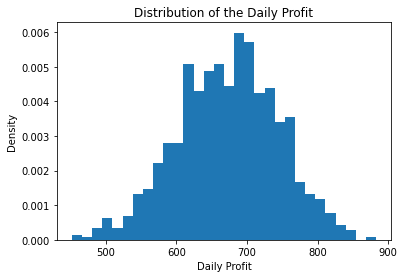

In [ ]:
# Simulate the system for 1000 times
samples=np.array([system_N() for i in range(1000)])
# Plot the distribution of the profit
plt.hist(samples,bins=30,density=True)
plt.xlabel('Daily Profit')
plt.ylabel('Density')
plt.title('Distribution of the Daily Profit')
plt.show()

According to the plot above, the Daily Profit follows a approximately Normal Distribution, so we can calculate the mean and 95% confidence intervals below.

In [ ]:
mean=np.mean(samples)
mean

673.088

In [ ]:
ci=(mean-1.96*np.std(samples),mean+1.96*np.std(samples))
ci

(533.2121738760782, 812.9638261239218)

##Q2. [7 Points]

The company thinking about purchasing a device that would auto-dry the car. This will add 1 minute to the auto-service time. For the hand-dry part, the service will only be 20% of the previous time. 

For the hand-dry part, the cars will receive the service with the worker available first. If both worker1 and worker 2 are available, worker 2 will always get the customer. Worker 1 and Worker 2 will not work on the same car anymore. 

* Based on simulation, decide whether this plan will increase revenue.

In [ ]:
# Simulate the system and return the revenue generated during the day

# customers arrival process
def arrival(revenue,env,auto,worker_1,worker_2):
  lmbda=5
  while True:
    # generate a new arrival
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    # check if the total number of cars in the system exceeds 5
    num_of_cars = len(auto.queue) + len(auto.users)+len(worker_1.queue)+len(worker_1.users)+len(worker_2.users)
    if num_of_cars>=5:
      # ignores the following lines, go back to the beginning of the `while` loop to generate next arrival
      continue
    else:
      # stop the arrival process if the time passed 12
      if env.now<=12:
        # start next process: `clean` for this car
        env.process(clean(revenue,env,auto,worker_1,worker_2))
      else:
        break

# auto-cleaning service process
def clean(revenue,env,auto,worker_1,worker_2):
  #Step 1: send a request to the auto-cleaning server
  rqt=auto.request()

  #Step 2: allow the car to occupy the auto-cleaning server
  yield rqt

  #Step 3: choose a service type from [Silver, Gold, Platinum] and spend some time in the server
  u=np.random.rand()
  # `Silver` type with probability of 0.3
  if u<0.3:
    yield env.timeout(5/60+1/60)              # add 1 minute: 1/60 hrs
    pay=10
  # `Gold` type with probability of 0.5
  elif u<0.8:
    yield env.timeout(6/60+1/60)              # add 1 minute: 1/60 hrs
    pay=12
  # `Platinum` type with probability of 0.2
  else:
    yield env.timeout(7/60+1/60)              # add 1 minute: 1/60 hrs
    pay=15

  revenue.append(pay)

  #Step 4: release the request from the server, so that the server will be able to serve next car
  auto.release(rqt)

  #Step 5: start next process: `dry` for this car
  env.process(dry(env,worker_1,worker_2))


# hand-dry service process
def dry(env,worker_1,worker_2):
  #Step 1: send a request to both servers: worker_1 and worker_2
  rqt_1 = worker_1.request()
  rqt_2 = worker_2.request()

  #Step 2: #wait for the servers to be available
  result=yield rqt_1|rqt_2

  #Step 3: #check which one(or both) is available: 3 cases in total

  # only worker_1 is available
  if rqt_1 in result and rqt_2 not in result:
    #delete the request from the worker_2's queue list:
    rqt_2.cancel()
    #move on with worker_1
    yield env.timeout(0.2*((10+np.random.rand()*10)/60))     # service time will only be 20% of the previous time
    worker_1.release(rqt_1)
  
  # only worker_2 is available
  elif rqt_2 in result and rqt_1 not in result:
    #delete the request from the worker_1's queue list:
    rqt_1.cancel()
    #move on with worker_2
    yield env.timeout(0.2*((15+np.random.rand()*15)/60))     # service time will only be 20% of the previous time
    worker_2.release(rqt_2)
  
  # both workers are available
  else:
    # worker_2 will always get the car
    #delete the request from the worker_1's user list:
    worker_1.release(rqt_1)
    #move on with server_2
    yield env.timeout(0.2*((15+np.random.rand()*15)/60))     # service time will only be 20% of the previous time
    worker_2.release(rqt_2)

def system_N_with_device():
  #np.random.seed(10) 
  revenue=[]
  env=simpy.Environment()
  auto=simpy.Resource(env)         # auto-cleaning device can only takes 1 car at a time
  worker_1=simpy.Resource(env)     # worker_1 can only takes 1 car at a time
  worker_2=simpy.Resource(env)     # worker_2 can only takes 1 car at a time
                                  ### all 3 servers have a capacity of 1
  env.process(arrival(revenue,env,auto,worker_1,worker_2))
  env.run()
  return sum(revenue)
system_N_with_device()

675

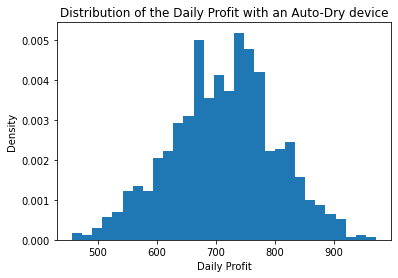

In [ ]:
# Simulate the system for 1000 times
samples_with_device=[system_N_with_device() for i in range(1000)]
# Plot the distribution of the profit
plt.hist(samples_with_device,bins=30,density=True)
plt.xlabel('Daily Profit')
plt.ylabel('Density')
plt.title('Distribution of the Daily Profit with an Auto-Dry device')
plt.show()

According to the plot above, the Daily Profit follows a approximately Normal Distribution, so we can calculate the mean and 95% confidence intervals below.

In [ ]:
mean_with_device=np.mean(samples_with_device)
mean_with_device

712.467

In [ ]:
ci_with_device=(mean_with_device-1.96*np.std(samples_with_device),mean_with_device+1.96*np.std(samples_with_device))
ci_with_device

(538.9478235090496, 885.9861764909504)

In [ ]:
# according to the two plots, both systems' daily profit follow a approximately Normal Distribution
# so we can compare their mean profits and 95% confidence intervals
print(mean, ci)
print(mean_with_device,ci_with_device)

673.088 (533.2121738760782, 812.9638261239218)
712.467 (538.9478235090496, 885.9861764909504)


After the comparison above, this plan will INCREASE the revenue on average.